In [8]:
#tweets regarding compliments
thank_index = airlines[(airlines['lemmatized'].str.contains('thank',regex = False)== True)|
                       (airlines['lemmatized'].str.contains('thanks',regex = False)== True)|
                       (airlines['lemmatized'].str.contains('thx',regex = False)== True)|
                       (airlines['lemmatized'].str.contains('thankyou',regex = False)== True)].index.tolist()

airlines.loc[thank_index,'compliment'] = 1

#tweets regarding staff
staff_index = airlines[(airlines['lemmatized'].str.contains('staff',regex = False)== True)|
                       (airlines['lemmatized'].str.contains('pilot',regex = False)== True)|
                       (airlines['lemmatized'].str.contains('captain',regex = False)== True)|
                       (airlines['lemmatized'].str.contains('agent',regex = False)== True)|
                       (airlines['lemmatized'].str.contains('crew',regex = False)== True)|
                       (airlines['lemmatized'].str.contains('supervisor',regex = False)== True)|
                       (airlines['lemmatized'].str.contains('attendant',regex = False)== True)|
                       (airlines['lemmatized'].str.contains('unprofessional',regex = False)== True)|
                       (airlines['lemmatized'].str.contains('customerservice',regex = False)== True)|
                       (airlines['lemmatized'].str.contains('badcustomerservice',regex = False)== True)|
                       (airlines['lemmatized'].str.contains('learncustomerservice',regex = False)== True)|
                       ((airlines['lemmatized'].str.contains('customer',regex = False)) & 
                        airlines['lemmatized'].str.contains('service',regex = False))].index.tolist()

airlines.loc[staff_index,'staff'] = 1

#tweets regarding delays
delay_index = airlines[(airlines['lemmatized'].str.contains('delay',regex = False)== True)|
                       (airlines['lemmatized'].str.contains('delayed',regex = False)== True)|
                       (airlines['lemmatized'].str.contains('wait',regex = False)== True)|
                       (airlines['lemmatized'].str.contains('waiting',regex = False)== True)|
                       (airlines['lemmatized'].str.contains('stuck',regex = False)== True)|
                       (airlines['lemmatized'].str.contains('late',regex = False)== True)|
                       (airlines['lemmatized'].str.contains('slow',regex = False)== True)].index.tolist()

airlines.loc[delay_index,'delay'] = 1

#tweets regarding ticketing & billing
ticketing_index = airlines[(airlines['lemmatized'].str.contains('ticket',regex = False)== True)|
                           (airlines['lemmatized'].str.contains('tix',regex = False)== True)|
                           (airlines['lemmatized'].str.contains('credit',regex = False)== True)|
                           (airlines['lemmatized'].str.contains('charges',regex = False)== True)|
                           (airlines['lemmatized'].str.contains('ticketing',regex = False)== True)].index.tolist()

airlines.loc[ticketing_index,'ticketing_billing'] = 1

#tweets regarding baggage
bag_index = airlines[(airlines['lemmatized'].str.contains('baggage',regex = False)== True)|
                     (airlines['lemmatized'].str.contains('bag',regex = False)== True)|
                     (airlines['lemmatized'].str.contains('break',regex = False)== True)|
                     (airlines['lemmatized'].str.contains('suitcase',regex = False)== True)|
                     (airlines['lemmatized'].str.contains('broke',regex = False)== True)|
                     (airlines['lemmatized'].str.contains('luggage',regex = False)== True)].index.tolist()

airlines.loc[bag_index,'baggage'] = 1

#tweets regarding refunds
refund_index = airlines[(airlines['lemmatized'].str.contains('refund',regex = False)== True)|
                        (airlines['lemmatized'].str.contains('refunded',regex = False)== True)|
                        (airlines['lemmatized'].str.contains('claim',regex = False)== True)|
                        (airlines['lemmatized'].str.contains('reimburse',regex = False)== True)].index.tolist()

airlines.loc[refund_index,'refund'] = 1


#tweets regarding cancellation
cancel_index = airlines[(airlines['lemmatized'].str.contains('cancelled',regex = False)== True)|
                        (airlines['lemmatized'].str.contains('cancellation',regex = False)== True)].index.tolist()

airlines.loc[cancel_index,'cancellation'] = 1 

#tweets regarding website or app
web_index = airlines[(airlines['lemmatized'].str.contains('website',regex = False)== True)|
                     (airlines['lemmatized'].str.contains('webpage',regex = False)== True)|
                     (airlines['lemmatized'].str.contains('app',regex = False)== True)|
                     (airlines['lemmatized'].str.contains('dm',regex = False)== True)].index.tolist()

airlines.loc[web_index,'online'] = 1

#tweets regarding loyalty program
loyalty_index = airlines[(airlines['lemmatized'].str.contains('loyalty program',regex = False)== True)|
                     (airlines['lemmatized'].str.contains('mileageplus',regex = False)== True)|
                     (airlines['lemmatized'].str.contains('freqyent flyer program',regex = False)== True)|
                     (airlines['lemmatized'].str.contains('mileage',regex = False)== True)].index.tolist()

airlines.loc[loyalty_index,'loyalty_program'] = 1 

#tweets regarding connections
connect_index = airlines[(airlines['lemmatized'].str.contains('connection',regex = False)== True)].index.tolist()

airlines.loc[connect_index,'connection'] = 1

#tweets regarding children
child_index = airlines[(airlines['lemmatized'].str.contains('child',regex = False)== True)|
                       (airlines['lemmatized'].str.contains('children',regex = False)== True)|
                       (airlines['lemmatized'].str.contains('kid',regex = False)== True)|
                       (airlines['lemmatized'].str.contains('grandchild',regex = False)== True)|
                       (airlines['lemmatized'].str.contains('grandchildren',regex = False)== True)|
                       (airlines['lemmatized'].str.contains('boy',regex = False)== True)|
                       (airlines['lemmatized'].str.contains('girl',regex = False)== True)|
                       (airlines['lemmatized'].str.contains('infant',regex = False)== True)|
                       (airlines['lemmatized'].str.contains('daughter',regex = False)== True)|
                       (airlines['lemmatized'].str.contains('son',regex = False)== True)|
                       (airlines['lemmatized'].str.contains('baby',regex = False)== True)].index.tolist()

airlines.loc[child_index,'children'] = 1

# Bert

In [162]:
# The input data dir. Should contain the .tsv files (or other data files) for the task.
DATA_DIR = "./data"

# Bert pre-trained model selected in the list: bert-base-uncased, 
# bert-large-uncased, bert-base-cased, bert-large-cased, bert-base-multilingual-uncased,
# bert-base-multilingual-cased, bert-base-chinese.
BERT_MODEL = 'bert-base-cased'

# The name of the task to train.I'm going to name this 'yelp'.
TASK_NAME = 'yelp'

# The output directory where the fine-tuned model and checkpoints will be written.
OUTPUT_DIR = f'outputs/{TASK_NAME}/'

# The directory where the evaluation reports will be written to.
REPORTS_DIR = f'reports/{TASK_NAME}_evaluation_report/'

# This is where BERT will look for pre-trained models to load parameters from.
CACHE_DIR = 'cache/'

# The maximum total input sequence length after WordPiece tokenization.
# Sequences longer than this will be truncated, and sequences shorter than this will be padded.
MAX_SEQ_LENGTH = 128

TRAIN_BATCH_SIZE = 24
EVAL_BATCH_SIZE = 32
LEARNING_RATE = 2e-5
NUM_TRAIN_EPOCHS = 1
RANDOM_SEED = 42
GRADIENT_ACCUMULATION_STEPS = 1
WARMUP_PROPORTION = 0.1
OUTPUT_MODE = 'classification'

CONFIG_NAME = "config.json"
WEIGHTS_NAME = "pytorch_model.bin"

In [163]:
if os.path.exists(REPORTS_DIR) and os.listdir(REPORTS_DIR):
        REPORTS_DIR += f'/report_{len(os.listdir(REPORTS_DIR))}'
        os.makedirs(REPORTS_DIR)
if not os.path.exists(REPORTS_DIR):
    os.makedirs(REPORTS_DIR)
    REPORTS_DIR += f'/report_{len(os.listdir(REPORTS_DIR))}'
    os.makedirs(REPORTS_DIR)

In [164]:
if os.path.exists(OUTPUT_DIR) and os.listdir(OUTPUT_DIR):
        raise ValueError("Output directory ({}) already exists and is not empty.".format(OUTPUT_DIR))
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

In [165]:
processor = BinaryClassificationProcessor()
train_examples = processor.get_train_examples(DATA_DIR)
train_examples_len = len(train_examples)

NameError: name 'BinaryClassificationProcessor' is not defined

In [138]:
label_list = processor.get_labels() # [0, 1] for binary classification
num_labels = len(label_list)

NameError: name 'processor' is not defined

In [30]:
num_train_optimization_steps = int(
    train_examples_len / TRAIN_BATCH_SIZE / GRADIENT_ACCUMULATION_STEPS) * NUM_TRAIN_EPOCHS

In [31]:
# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-cased', do_lower_case=False)

In [32]:
label_map = {label: i for i, label in enumerate(label_list)}
train_examples_for_processing = [(example, label_map, MAX_SEQ_LENGTH, tokenizer, OUTPUT_MODE) for example in train_examples]

In [33]:
process_count = cpu_count() - 1
if __name__ ==  '__main__':
    print(f'Preparing to convert {train_examples_len} examples..')
    print(f'Spawning {process_count} processes..')
    with Pool(process_count) as p:
        train_features = list(tqdm_notebook(p.imap(convert_examples_to_features.convert_example_to_feature, train_examples_for_processing), total=train_examples_len))

Preparing to convert 5704 examples..
Spawning 11 processes..


In [34]:
# with open(DATA_DIR + "train_features.pkl", "wb") as f:
#     pickle.dump(train_features, f)

In [ ]:
# with open(DATA_DIR + "train_features.pkl", "rb") as f:
#     train_features = pickle.load(f)

In [35]:
# Load pre-trained model (weights)
# model = BertForSequenceClassification.from_pretrained(CACHE_DIR + 'cased_base_bert_pytorch.tar.gz', cache_dir=CACHE_DIR, num_labels=num_labels)
model = BertForSequenceClassification.from_pretrained(BERT_MODEL, cache_dir=CACHE_DIR, num_labels=num_labels)

In [36]:
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): BertLayerNorm()
      (dropout): Dropout(p=0.1)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): BertLayerNorm()
              (dropout): Dropout(p=0.1)
            )
          )
          (intermediat

In [37]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
    ]

In [38]:
optimizer = BertAdam(optimizer_grouped_parameters,
                     lr=LEARNING_RATE,
                     warmup=WARMUP_PROPORTION,
                     t_total=num_train_optimization_steps)

In [39]:
global_step = 0
nb_tr_steps = 0
tr_loss = 0

In [40]:
logger.info("***** Running training *****")
logger.info("  Num examples = %d", train_examples_len)
logger.info("  Batch size = %d", TRAIN_BATCH_SIZE)
logger.info("  Num steps = %d", num_train_optimization_steps)
all_input_ids = torch.tensor([f.input_ids for f in train_features], dtype=torch.long)
all_input_mask = torch.tensor([f.input_mask for f in train_features], dtype=torch.long)
all_segment_ids = torch.tensor([f.segment_ids for f in train_features], dtype=torch.long)

if OUTPUT_MODE == "classification":
    all_label_ids = torch.tensor([f.label_id for f in train_features], dtype=torch.long)
elif OUTPUT_MODE == "regression":
    all_label_ids = torch.tensor([f.label_id for f in train_features], dtype=torch.float)

In [41]:
train_data = TensorDataset(all_input_ids, all_input_mask, all_segment_ids, all_label_ids)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=TRAIN_BATCH_SIZE)

In [42]:
model.train()
for _ in trange(int(NUM_TRAIN_EPOCHS), desc="Epoch"):
    tr_loss = 0
    nb_tr_examples, nb_tr_steps = 0, 0
    for step, batch in enumerate(tqdm_notebook(train_dataloader, desc="Iteration")):
        batch = tuple(t.to(device) for t in batch)
        input_ids, input_mask, segment_ids, label_ids = batch

        logits = model(input_ids, segment_ids, input_mask, labels=None)

        if OUTPUT_MODE == "classification":
            loss_fct = CrossEntropyLoss()
            loss = loss_fct(logits.view(-1, num_labels), label_ids.view(-1))
        elif OUTPUT_MODE == "regression":
            loss_fct = MSELoss()
            loss = loss_fct(logits.view(-1), label_ids.view(-1))

        if GRADIENT_ACCUMULATION_STEPS > 1:
            loss = loss / GRADIENT_ACCUMULATION_STEPS

        loss.backward()
        print("\r%f" % loss, end='')
        
        tr_loss += loss.item()
        nb_tr_examples += input_ids.size(0)
        nb_tr_steps += 1
        if (step + 1) % GRADIENT_ACCUMULATION_STEPS == 0:
            optimizer.step()
            optimizer.zero_grad()
            global_step += 1

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

0.408837

KeyboardInterrupt: 

In [ ]:
model_to_save = model.module if hasattr(model, 'module') else model  # Only save the model it-self

# If we save using the predefined names, we can load using `from_pretrained`
output_model_file = os.path.join(OUTPUT_DIR, WEIGHTS_NAME)
output_config_file = os.path.join(OUTPUT_DIR, CONFIG_NAME)

torch.save(model_to_save.state_dict(), output_model_file)
model_to_save.config.to_json_file(output_config_file)
tokenizer.save_vocabulary(OUTPUT_DIR)

<a id="map"></a>
## Plot Tweet locations on a Map 

In [3]:
def get_coord_lat(place):
    geolocator = Nominatim(user_agent='myapplication',timeout=None)
    location = geolocator.geocode(place)
    if location != None:
        return location.raw['lat']

def get_coord_lon(place):
    geolocator = Nominatim(user_agent='myapplication',timeout=None)
    location = geolocator.geocode(place)
    if location != None:
        return location.raw['lon']

In [73]:
# Create two lists for the loop results to be placed
lat = []
lon = []

# For each row in a varible,
for row in airlines['tweet_coord']:
    # Try to,
    try:
        # Split the row by comma and append
        # everything before the comma to lat
        lat.append(row.split(',')[0])
        # Split the row by comma and append
        # everything after the comma to lon
        lon.append(row.split(',')[1])
    # But if you get an error
    except:
        # append a missing value to lat
        lat.append(np.NaN)
        # append a missing value to lon
        lon.append(np.NaN)

airlines['latitude']= lat
airlines['longitude']= lon

airlines['latitude'] = airlines['latitude'].str.strip('[')
airlines['longitude'] = airlines['longitude'].str.strip(']')

airlines['latitude'] = airlines['latitude'].str.strip(' [')
airlines['longitude'] = airlines['longitude'].str.strip(']}')

airlines.latitude = airlines.latitude.astype(float).fillna(0.0)
airlines.longitude = airlines.longitude.astype(float).fillna(0.0)

In [7]:
import pandas as pd
from geopy.geocoders import Nominatim
import geopandas
airlines = pd.read_csv('airlines_coordinates.csv')

In [8]:
airlines.loc[:,'latitude'] = airlines.loc[:,'tweet_location'].map(get_coord_lat,na_action='ignore')
airlines.loc[:,'longitude'] = airlines.loc[:,'tweet_location'].map(get_coord_lon,na_action='ignore')
#airlines.lat = airlines.lat.astype(float).fillna(0.0)
#airlines.lon = airlines.lon.astype(float).fillna(0.0)
airlines.to_csv("airlines_coordinates.csv")

In [75]:
airlines = pd.read_csv("./data/airlines_coordinates.csv")

airlines[airlines['longitude'] == 'embraer sign contract unit airlin sell jet us 19 billion free tv tuesday']

airlines.drop(4037,inplace = True)

In [76]:
airlines[['latitude','longitude','lat','lon']] = airlines[['latitude','longitude','lat','lon']].astype(float)

In [77]:
airlines

,Unnamed: 0,text,tweet_coord,tweet_created,tweet_location,negative,positive,neutral,compound,latitude,longitude,lemmatized,lat,lon
0,0.0,thanks,NaN,2015-02-24 11:42:48 -0800,usa,0.000,1.000,0.000,0.4404,0.000000,0.000000,thank,39.783730,-100.445882
1,1.0,Thanks for taking care of that MR!! Happy customer.,NaN,2015-02-24 11:42:41 -0800,"Richmond, VA",0.000,0.634,0.366,0.8856,0.000000,0.000000,thank take care mr happi custom,37.538509,-77.434280
2,2.0,still no refund or word via DM. Please resolve this issue as your Cancelled Flightled flight was useless to my assistant's trip.,NaN,2015-02-24 11:39:45 -0800,"Bay Area, California",0.242,0.170,0.588,-0.2732,0.000000,0.000000,still refund word via dm pleas resolv issu cancel flightl flight useless assistant' trip,37.788497,-122.355847
3,3.0,Delayed due to lack of crew and now delayed again because there's a long line for deicing... Still need to improve service #united,NaN,2015-02-24 11:39:25 -0800,NaN,0.226,0.107,0.667,-0.2960,0.000000,0.000000,delay due lack crew delay there' long line deic still need improv servic unit,0.000000,0.000000
4,4.0,thanks -- we filled it out. How's our luck with this? Is it common?,NaN,2015-02-24 11:38:15 -0800,NaN,0.000,0.343,0.657,0.7399,0.000000,0.000000,thank fill how' luck common,0.000000,0.000000
5,5.0,Your ERI-ORD express connections are hugely popular .. now if only we could have an ERI-EWR hop! :),NaN,2015-02-24 11:36:12 -0800,"Erie, PA",0.000,0.285,0.715,0.7495,0.000000,0.000000,eriord express connect huge popular could eriewr hop,42.129471,-80.085269
6,6.0,even on international flight Glasgow to the U.S.? Then what about orlando to Newark? All 90 mins?,NaN,2015-02-24 11:33:46 -0800,"Kilmarnock, now Edinburgh.",0.000,0.000,1.000,0.0000,0.000000,0.000000,even intern flight glasgow us orlando newark 90 min,0.000000,0.000000
7,7.0,you think you boarded flight AU1066 too early? I think so.,"[19.43706642, -99.07927123]",2015-02-24 11:31:01 -0800,New York,0.000,0.000,1.000,0.0000,19.437066,-99.079271,think board flight au1066 earli think,40.712728,-74.006015
8,8.0,"I understand, but it's tough when there is no way to get to the airport w/o serious risk of an accident. It's a steep price.",NaN,2015-02-24 11:20:56 -0800,"Berkeley Heights, NJ",0.416,0.000,0.584,-0.8957,0.000000,0.000000,understand tough way get airport wo seriou risk accid steep price,40.683435,-74.442653
9,9.0,"Gate agent hooked me up with alternate flights. If you have a way to PREVENT the constant issues, that would rock.",NaN,2015-02-24 11:19:32 -0800,"Columbus, Ohio",0.000,0.088,0.912,0.2103,0.000000,0.000000,gate agent hook altern flight way prevent constant issu would rock,39.962260,-83.000706


In [78]:
happy = airlines[airlines['compound'] > 0.55]
not_happy = airlines[airlines['compound'] < 0.45]
neutral = airlines[(airlines['compound'] >= 0.45) & (airlines['compound'] <= 0.55)]

In [79]:
# showing tweets with neutral compound scores
neutral = airlines[(airlines['compound'] >= 0.45) & (airlines['compound'] <= 0.55)]
pd.set_option('display.max_colwidth', -1)

In [80]:
airlines_coord = geopandas.GeoDataFrame(airlines, geometry=geopandas.points_from_xy(airlines.longitude, airlines.latitude))
happy_coord = geopandas.GeoDataFrame(happy, geometry=geopandas.points_from_xy(happy.longitude, happy.latitude))
not_happy_coord = geopandas.GeoDataFrame(not_happy, geometry=geopandas.points_from_xy(not_happy.longitude, not_happy.latitude))

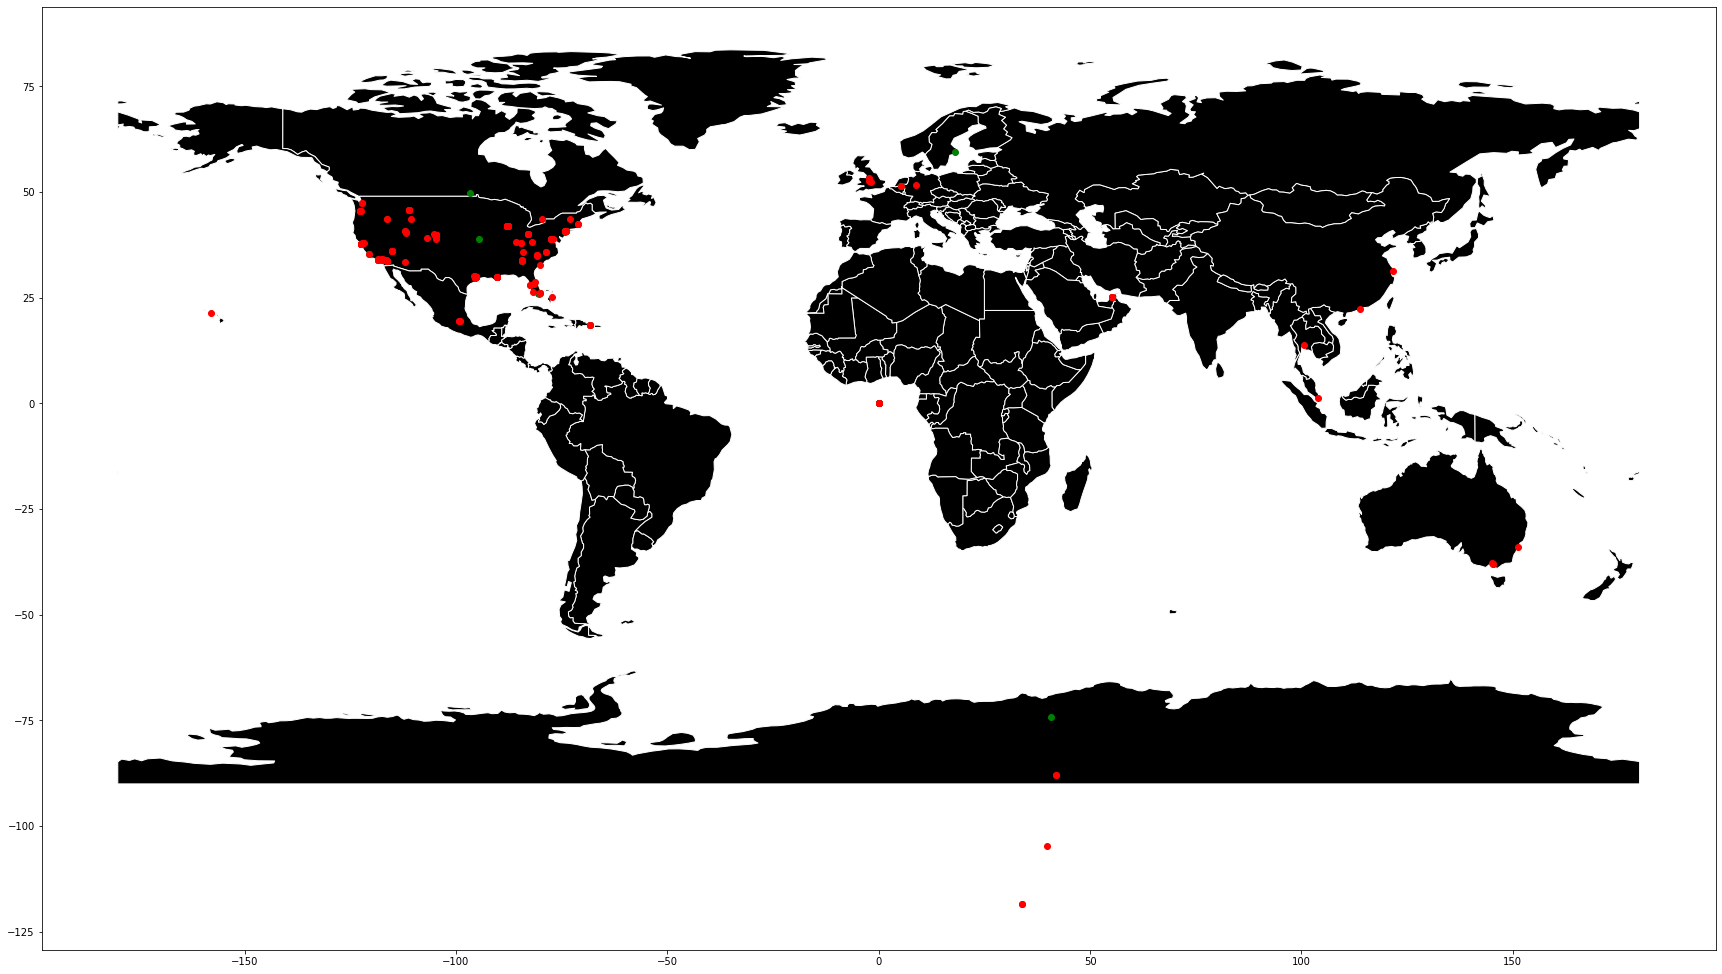

In [81]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world.plot(color='black', edgecolor='white',figsize=(30, 20))

# We can now plot our GeoDataFrame.
happy_coord.plot(ax=ax, color='green')
not_happy_coord.plot(ax=ax, color='red')

plt.show()

## Manual Labelling

In [ ]:
airlines.loc[50:100,'text']

In [ ]:
airlines['label']=''

In [ ]:
airlines.loc[[0,1,17,23,48,74,94,97],'label'] = 'compliment'
airlines.loc[[3,9,26,31,46,59,62,66,68,75,76,77,81,82,84,88,90,91,99,100],'label'] = 'staff'
airlines.loc[[14,15,25,32,38,39,55,60,64,78],'label'] = 'ticketing'
airlines.loc[[2,16,50],'label'] = 'refund'
airlines.loc[[35,53,56,71],'label'] = 'delay_cancelled'
airlines.loc[[4,5,6,10,13,27,31,43,44,45,58,73],'label'] = 'enquiry'
airlines.loc[[19,33,40,51,61,63,65],'label'] = 'baggage'
airlines.loc[[49],'label'] = 'cabin'
airlines.loc[[57,69,83,89,93],'label'] = 'website_app'
airlines.loc[[79],'label'] = 'loyalty_program'

In [ ]:
testing = airlines[airlines['label']!= '']

In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [ ]:
X = testing.clean
y = testing.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)                                              

In [ ]:
# using Tfidf and Naive Bayes Multinomial Classifier
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('cls', MultinomialNB())
])

In [ ]:
# obtaining the best values for Tfidf vertorizer
pipe_params = {
    'tvec__max_features': [20,30,30,40,50],
    'tvec__min_df': [0.03,0.04,0.05,0.06],
    'tvec__max_df': [.4,.5,.6],
    'tvec__ngram_range': [(1,1), (1,2),(1,3),(1,4)]
}
gs = GridSearchCV(pipe, param_grid=pipe_params,cv=3,n_jobs=-1)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

In [ ]:
# using count vectorizer and logistic regression
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('lr', LogisticRegression(solver='liblinear'))
])

In [ ]:
# obtaining the best values for count vectorizer
pipe_params = {
    'cvec__max_features': [50,100,150,200,300,400,500],
    'cvec__min_df': [0.01,0.02,0.03],
    'cvec__max_df': [.4,.5,.6],
    'cvec__ngram_range': [(1,1), (1,2),(1,3),(1,4)]
}
gs = GridSearchCV(pipe, param_grid=pipe_params,cv=3,n_jobs=-1)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

In [ ]:
# Instantiate the "CountVectorizer" object, which is scikit-learn's bag of words tool.
vectorizer = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None,
                             max_features = 40, ngram_range=(1,5)) 